# Savannah Tracking

In [15]:
from astropy.io import ascii
from astropy.table import Table,Column

In [79]:
zebra = ascii.read('data/ST2010-3506 Grey Zebra Kalama.csv')

In [53]:
animal

collarid,DATETIME,LATITUDE,LONGITUDE,HEADING,SPEED,ALTITUDE
string88,string128,float64,float64,int32,float64,int32
st2010-3502,01/01/2015 00:00,0.242147,37.391762,0,0.0,1730
st2010-3502,01/01/2015 01:00,0.226135,37.399556,0,0.0,1730
st2010-3502,01/01/2015 02:00,0.226114,37.399466,137,0.0,1724
st2010-3502,01/01/2015 03:00,0.232846,37.406688,0,0.0,1716
st2010-3502,01/01/2015 04:00,0.233425,37.406788,27,0.0,1711
st2010-3502,01/01/2015 05:00,0.233468,37.406757,0,0.0,1709
st2010-3502,01/01/2015 06:00,0.233441,37.406736,50,0.0,1709
st2010-3502,01/01/2015 07:00,0.233762,37.406741,5,3.4,1707
st2010-3502,01/01/2015 08:00,0.234677,37.408781,217,0.0,1705


In [55]:
count = 0
for row in animal:
    if (row[2] !='--'):
        if (count==0):
            animal_filtered=Table(row)
        else:
            animal_filtered.add_row(row)
        count=count+1
animal_filtered

collarid,DATETIME,LATITUDE,LONGITUDE,HEADING,SPEED,ALTITUDE
string88,string128,float64,float64,int32,float64,int32
st2010-3502,01/01/2015 00:00,0.242147,37.391762,0,0.0,1730
st2010-3502,01/01/2015 01:00,0.226135,37.399556,0,0.0,1730
st2010-3502,01/01/2015 02:00,0.226114,37.399466,137,0.0,1724
st2010-3502,01/01/2015 03:00,0.232846,37.406688,0,0.0,1716
st2010-3502,01/01/2015 04:00,0.233425,37.406788,27,0.0,1711
st2010-3502,01/01/2015 05:00,0.233468,37.406757,0,0.0,1709
st2010-3502,01/01/2015 06:00,0.233441,37.406736,50,0.0,1709
st2010-3502,01/01/2015 07:00,0.233762,37.406741,5,3.4,1707
st2010-3502,01/01/2015 08:00,0.234677,37.408781,217,0.0,1705


In [56]:
from pywwt.mods import *

In [57]:
#Connect to WWT
wwt = WWTClient(host="127.0.0.1") #Can pass a IP address here if WWT is running on a remote machine


Connecting to WWT on host 127.0.0.1.


In [26]:
wwt.new_layer_group("Earth","Savannah")

In [58]:
#Set up WWT layer
savannah_layer = wwt.new_layer("Earth", "Lion Scar", animal_filtered.colnames)
#Set visualization parameters in WWT
props_dict = {"CoordinatesType":"Spherical",\
              "MarkerScale":"Screen",\
              "PointScaleType":"Constant",\
              "ScaleFactor":"8",\
              "ShowFarSide":"True",\
              "RaUnits":"Degrees",\
              "PlotType":"Circle",\
              "ColorValue":"ARGBColor:255:255:255:255",\
              "TimeSeries":"False"}
savannah_layer.set_properties(props_dict)
#Send data to WWT client
savannah_layer.update(data=animal_filtered, purge_all=True, no_purge=False, show=True)

In [59]:
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

## Lions are Lazy, zebras too, elephants not so much

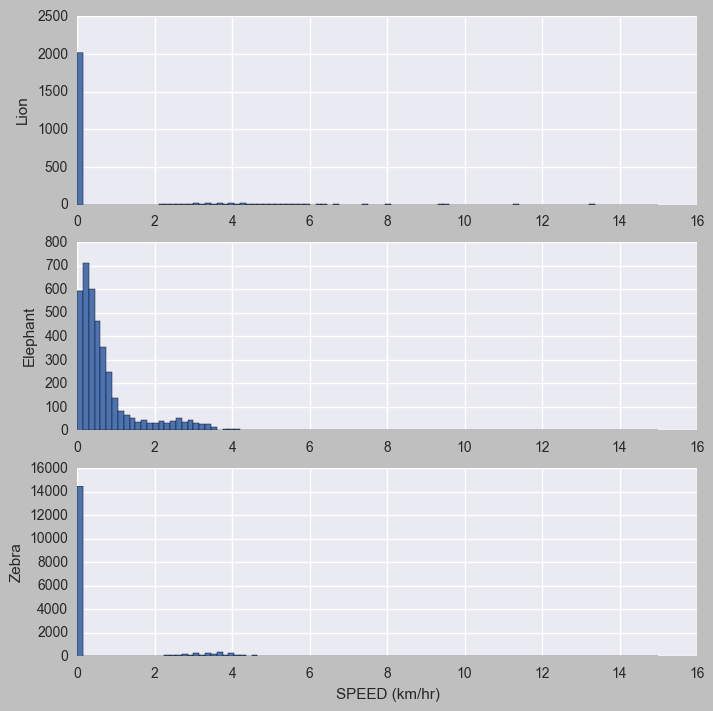

In [85]:
fig = plt.figure (figsize=(8,8))
p1 = fig.add_subplot(311)
p1.hist(animal_filtered['SPEED'],bins=100,range=[0, 15])
p2 = fig.add_subplot(312)
p2.hist(elephant['SPEED'],bins=100,range=[0, 15])
p3 = fig.add_subplot(313)
p3.hist(zebra['SPEED'],bins=100,range=[0, 15])
p1.set_ylabel("Lion")
p2.set_ylabel("Elephant")
p3.set_ylabel("Zebra")
plt.xlabel("SPEED (km/hr)")